In [1]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)

In [1]:
from glob import glob
import os

root = './datasets/fruits/original'

directories = glob(os.path.join(root, '*'))
directory_names = []
for directory in directories:
    directory_names.append(directory[directory.rindex('\\') + 1:])

print(directory_names)

['appll', 'banana', 'cherry', 'chickoo', 'grapes', 'kiwi', 'mango', 'orange', 'strawberry']


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
root = './datasets/fruits/original'
# root = './datasets/face/test/'
image_data_generator = ImageDataGenerator(rescale=1./255)

generator = image_data_generator.flow_from_directory(root, target_size=(244, 244), batch_size=32, class_mode='categorical')
print(generator.class_indices)
# generator_test = image_data_generator.flow_from_directory(root, target_size=(48, 48), batch_size=32, class_mode='categorical')
# print(generator_test.class_indices)

Found 359 images belonging to 9 classes.
{'appll': 0, 'banana': 1, 'cherry': 2, 'chickoo': 3, 'grapes': 4, 'kiwi': 5, 'mango': 6, 'orange': 7, 'strawberry': 8}


In [3]:
import pandas as pd

f_df = pd.DataFrame({'file_paths': generator.filepaths, 'targets': generator.classes})
f_df

,file_paths,targets
0,./datasets/fruits/original\appll\Image_1.jpg,0
1,./datasets/fruits/original\appll\Image_10.jpg,0
2,./datasets/fruits/original\appll\Image_11.jpg,0
3,./datasets/fruits/original\appll\Image_12.jpg,0
4,./datasets/fruits/original\appll\Image_13.png,0
...,...,...
354,./datasets/fruits/original\strawberry\Image_5.jpg,8
355,./datasets/fruits/original\strawberry\Image_6.jpg,8
356,./datasets/fruits/original\strawberry\Image_7.jpg,8
357,./datasets/fruits/original\strawberry\Image_8.jpg,8


In [4]:
f_df.loc[:, 'file_paths'] = f_df.file_paths.apply(lambda x: x.replace('\\', '/'))
f_df

,file_paths,targets
0,./datasets/fruits/original/appll/Image_1.jpg,0
1,./datasets/fruits/original/appll/Image_10.jpg,0
2,./datasets/fruits/original/appll/Image_11.jpg,0
3,./datasets/fruits/original/appll/Image_12.jpg,0
4,./datasets/fruits/original/appll/Image_13.png,0
...,...,...
354,./datasets/fruits/original/strawberry/Image_5.jpg,8
355,./datasets/fruits/original/strawberry/Image_6.jpg,8
356,./datasets/fruits/original/strawberry/Image_7.jpg,8
357,./datasets/fruits/original/strawberry/Image_8.jpg,8


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root = './datasets/fruits/original/'

idg = ImageDataGenerator(rescale=1./255)

generator = idg.flow_from_directory(
    root,
    target_size=(244, 244),
    batch_size=32,
    class_mode='categorical'
)

print(generator.class_indices)

Found 359 images belonging to 9 classes.
{'appll': 0, 'banana': 1, 'cherry': 2, 'chickoo': 3, 'grapes': 4, 'kiwi': 5, 'mango': 6, 'orange': 7, 'strawberry': 8}


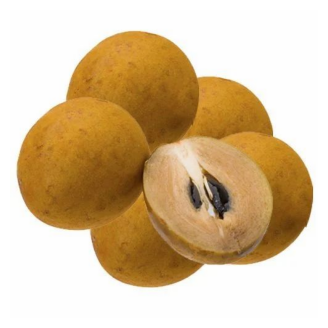

In [6]:
import cv2
import matplotlib.pyplot as plt

image = cv2.cvtColor(cv2.imread(generator.filepaths[124]), cv2.COLOR_BGR2RGB)

def show_image(image):
    plt.figure(figsize=(4, 4))
    plt.imshow(image)
    plt.axis('off')
    
show_image(image)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(f_df.file_paths, f_df.targets, stratify=f_df.targets, test_size=0.2, random_state=124)

print(y_train.value_counts())
print(y_test.value_counts())

targets
7    32
1    32
4    32
2    32
8    32
5    32
3    32
0    32
6    31
Name: count, dtype: int64
targets
0    8
6    8
8    8
2    8
1    8
3    8
7    8
5    8
4    8
Name: count, dtype: int64


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

print(y_train.value_counts())
print(y_val.value_counts())

targets
0    26
5    26
3    26
8    26
7    25
6    25
2    25
1    25
4    25
Name: count, dtype: int64
targets
7    7
1    7
2    7
4    7
0    6
8    6
3    6
6    6
5    6
Name: count, dtype: int64


In [12]:
import shutil

root = './datasets/fruits/'

for file_path in X_train:
    animal_dir = file_path[len(root + 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'train/' + animal_dir)

    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)

In [13]:
import shutil

root = './datasets/fruits/'

for file_path in X_val:
    animal_dir = file_path[len(root + 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'validation/' + animal_dir)

    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)

In [14]:
import shutil

root = './datasets/fruits/'

for file_path in X_test:
    animal_dir = file_path[len(root + 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'test/' + animal_dir)

    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)

In [2]:
import albumentations as A

def transform(image):
    aug = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.OneOf([
            A.ColorJitter(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5)
        ], p=1)
    ], p=0.5)
    return aug(image=image)['image']


# idg = ImageDataGenerator(preprocessing_function=transfrom, rescale=1./255)

In [3]:
def albumentations_preprocessing_function(image):
    image = image.astype(np.uint8)  # Ensure the image is in the right format
    image = transform(image=image)
    return image.astype(np.float16) / 255.0  # 이미지 타입을 float32로 변환하고 정규화


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/fruits/train'
validation_dir = './datasets/fruits/validation'
test_dir = './datasets/fruits/test'

train_data_generator = ImageDataGenerator(preprocessing_function=albumentations_preprocessing_function, rescale=1./255)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)


train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 229 images belonging to 9 classes.
Found 58 images belonging to 9 classes.
Found 72 images belonging to 9 classes.
{'appll': 0, 'banana': 1, 'cherry': 2, 'chickoo': 3, 'grapes': 4, 'kiwi': 5, 'mango': 6, 'orange': 7, 'strawberry': 8}
{'appll': 0, 'banana': 1, 'cherry': 2, 'chickoo': 3, 'grapes': 4, 'kiwi': 5, 'mango': 6, 'orange': 7, 'strawberry': 8}
{'appll': 0, 'banana': 1, 'cherry': 2, 'chickoo': 3, 'grapes': 4, 'kiwi': 5, 'mango': 6, 'orange': 7, 'strawberry': 8}


In [26]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# alpha를 크게 할 수록 Weight값을 작게 만들어서 과적합을 개선할 수 있고
# alpha를 작게 할 수록 Weight의 값이 커지지만, 어느 정도 상쇄하므로 과소적합을 개선할 수 있다.

x = Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same',kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)



x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(rate=0.3)(x)
output = Dense(9, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 244, 244, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 244, 244, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_27 (Activation)           │ (None, 244, 244, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 244, 244, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 244, 244, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_28 (Activation)           │ (None, 244, 244, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 244, 244, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 244, 244, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_29 (Activation)           │ (None, 244, 244, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 122, 122, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 122, 122, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 122, 122, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_30 (Activation)           │ (None, 122, 122, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 122, 122, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 122, 122, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_31 (Activation)           │ (None, 122, 122, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 122, 122, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 122, 122, 64)        │             2

 Total params: 35,046,465 (133.69 MB)

 Trainable params: 35,045,121 (133.69 MB)

 Non-trainable params: 1,344 (5.25 KB)

In [27]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])


In [28]:
import numpy as np

history = model.fit(
    train_generator,
    batch_size=32,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb]
)

Epoch 1/20


C:\Users\HANSUNG\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 57s 5s/step - acc: 0.1337 - loss: 71.4694 - val_acc: 0.1379 - val_loss: 1696.9677 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 49s 5s/step - acc: 0.2225 - loss: 28.4516 - val_acc: 0.1034 - val_loss: 5154.0439 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 47s 5s/step - acc: 0.2437 - loss: 7.6410 - val_acc: 0.1034 - val_loss: 5546.5156 - learning_rate: 0.0010
Epoch 4/20
5/8 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - acc: 0.2259 - loss: 5.8253

KeyboardInterrupt: 

In [39]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# alpha를 크게 할 수록 Weight값을 작게 만들어서 과적합을 개선할 수 있고
# alpha를 작게 할 수록 Weight의 값이 커지지만, 어느 정도 상쇄하므로 과소적합을 개선할 수 있다.

x = Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)


x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)


x = Conv2D(filters=512, kernel_size=3, padding='same',kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)



x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(rate=0.3)(x)
output = Dense(9, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_62 (Conv2D)                   │ (None, 244, 244, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_59               │ (None, 244, 244, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_59 (Activation)           │ (None, 244, 244, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_63 (Conv2D)                   │ (None, 244, 244, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_60               │ (None, 244, 244, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_60 (Activation)           │ (None, 244, 244, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_64 (Conv2D)                   │ (None, 244, 244, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_61               │ (None, 244, 244, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_61 (Activation)           │ (None, 244, 244, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_65 (Conv2D)                   │ (None, 244, 244, 256)       │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_62               │ (None, 244, 244, 256)       │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_62 (Activation)           │ (None, 244, 244, 256)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 122, 122, 256)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_66 (Conv2D)                   │ (None, 122, 122, 512)       │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_63               │ (None, 122, 122, 512)       │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_63 (Activation)           │ (None, 122, 122, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 61, 61, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 512)                 │              

 Total params: 1,729,153 (6.60 MB)

 Trainable params: 1,727,169 (6.59 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [40]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])


In [41]:
import numpy as np

history = model.fit(
    train_generator,
    batch_size=32,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb]
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 567s 78s/step - acc: 0.1632 - loss: 2.8611 - val_acc: 0.1034 - val_loss: 4.1736 - learning_rate: 0.0010
Epoch 2/20
1/8 ━━━━━━━━━━━━━━━━━━━━ 10:05 87s/step - acc: 0.2812 - loss: 2.1297

KeyboardInterrupt: 

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# alpha를 크게 할 수록 Weight값을 작게 만들어서 과적합을 개선할 수 있고
# alpha를 작게 할 수록 Weight의 값이 커지지만, 어느 정도 상쇄하므로 과소적합을 개선할 수 있다.

x = Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)


x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)


x = Conv2D(filters=512, kernel_size=3, padding='same',kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)



x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(rate=0.3)(x)
output = Dense(9, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 244, 244, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 244, 244, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 244, 244, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 244, 244, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 244, 244, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 244, 244, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 244, 244, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 244, 244, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 244, 244, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 122, 122, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 122, 122, 256)       │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 122, 122, 256)       │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 122, 122, 256)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 61, 61, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 61, 61, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 61, 61, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 61, 61, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 512)         │              

 Total params: 1,729,153 (6.60 MB)

 Trainable params: 1,727,169 (6.59 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

import numpy as np

history = model.fit(
    train_generator,
    batch_size=32,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb]
)

Epoch 1/20


C:\Users\HANSUNG\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 157s 18s/step - acc: 0.1483 - loss: 3.0583 - val_acc: 0.1207 - val_loss: 4.1490 - learning_rate: 0.0010
Epoch 2/20
7/8 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - acc: 0.1997 - loss: 2.3010

In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# alpha를 크게 할 수록 Weight값을 작게 만들어서 과적합을 개선할 수 있고
# alpha를 작게 할 수록 Weight의 값이 커지지만, 어느 정도 상쇄하므로 과소적합을 개선할 수 있다.

x = Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)


x = Conv2D(filters=64, kernel_size=3, padding='same',kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)



x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(rate=0.3)(x)
output = Dense(9, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 244, 244, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 244, 244, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 244, 244, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 244, 244, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 244, 244, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 244, 244, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │          19,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           2,709 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,985 (164.00 KB)

 Trainable params: 41,793 (163.25 KB)

 Non-trainable params: 192 (768.00 B)

In [6]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

import numpy as np

history = model.fit(
    train_generator,
    batch_size=32,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb]
)

Epoch 1/20


C:\Users\HANSUNG\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - acc: 0.0693 - loss: 2.6281 - val_acc: 0.1379 - val_loss: 2.2385 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - acc: 0.0944 - loss: 2.4109 - val_acc: 0.1207 - val_loss: 2.3119 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - acc: 0.1636 - loss: 2.1726 - val_acc: 0.1207 - val_loss: 2.4033 - learning_rate: 0.0010
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - acc: 0.1579 - loss: 2.1459 - val_acc: 0.1207 - val_loss: 2.4326 - learning_rate: 1.0000e-04
Epoch 5/20
1/8 ━━━━━━━━━━━━━━━━━━━━ 1:05 9s/step - acc: 0.0000e+00 - loss: 2.2224

KeyboardInterrupt: 

In [11]:
input_tensor = Input(shape=(IMAGE_SIZE,IMAGE_SIZE, 3))

x = Conv2D(filters=32, kernel_size=5, kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

# x = Conv2D(filters=64, kernel_size=5, strides=2, kernel_initializer='he_normal')(x)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)
# x = MaxPooling2D(2)(x)


# x = Conv2D(filters=128, kernel_size=5, strides=2, kernel_initializer='he_normal', padding='same')(input_tensor)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=5, strides=5, kernel_initializer='he_normal', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
# x = MaxPooling2D(2)(x)

x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(200, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(rate=0.3)(x)
output = Dense(9, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 240, 240, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 240, 240, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 240, 240, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 120, 120, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 200)                 │       7,373,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 9)                   │           1,809 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,428,889 (28.34 MB)

 Trainable params: 7,428,697 (28.34 MB)

 Non-trainable params: 192 (768.00 B)

In [12]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

import numpy as np

history = model.fit(
    train_generator,
    batch_size=32,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb]
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - acc: 0.1148 - loss: 9.2197 - val_acc: 0.1207 - val_loss: 8.1155 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 992ms/step - acc: 0.1851 - loss: 6.3368 - val_acc: 0.2069 - val_loss: 2.5250 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 955ms/step - acc: 0.3367 - loss: 1.9166 - val_acc: 0.2759 - val_loss: 2.2097 - learning_rate: 0.0010
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 880ms/step - acc: 0.3286 - loss: 1.8721 - val_acc: 0.2414 - val_loss: 3.2049 - learning_rate: 0.0010
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 997ms/step - acc: 0.4262 - loss: 1.6961 - val_acc: 0.1724 - val_loss: 3.0719 - learning_rate: 0.0010
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 917ms/step - acc: 0.4020 - loss: 1.5085 - val_acc: 0.1897 - val_loss: 3.0745 - learning_rate: 1.0000e-04
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - acc: 0.4701 - loss: 1.5273 - val_acc: 0.1724 - val_loss: 3.3126 - learning_rate: 1.0000e-04
Epoch 8/20



KeyboardInterrupt



In [13]:
input_tensor = Input(shape=(IMAGE_SIZE,IMAGE_SIZE, 3))

x = Conv2D(filters=32, kernel_size=5, kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=5, kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

# x = Conv2D(filters=64, kernel_size=5, strides=2, kernel_initializer='he_normal')(x)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)
# x = MaxPooling2D(2)(x)


# x = Conv2D(filters=128, kernel_size=5, strides=2, kernel_initializer='he_normal', padding='same')(input_tensor)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)


x = Conv2D(filters=64, kernel_size=5, kernel_initializer='he_normal', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)


x = Conv2D(filters=64, kernel_size=5, strides=5, kernel_initializer='he_normal', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
# x = MaxPooling2D(2)(x)

x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(200, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(rate=0.3)(x)
output = Dense(9, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 240, 240, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 240, 240, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 240, 240, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 236, 236, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 236, 236, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 236, 236, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 118, 118, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 118, 118, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 118, 118, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 118, 118, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 24, 24, 64)          │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 200)                 │       7,373,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 9)                   │           1,809 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 7,557,369 (28.83 MB)

 Trainable params: 7,556,985 (28.83 MB)

 Non-trainable params: 384 (1.50 KB)

In [14]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

import numpy as np

history = model.fit(
    train_generator,
    batch_size=32,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb]
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - acc: 0.1197 - loss: 11.6488 - val_acc: 0.1207 - val_loss: 32.1798 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - acc: 0.1950 - loss: 4.3036 - val_acc: 0.1379 - val_loss: 121.9279 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - acc: 0.2270 - loss: 2.8919 - val_acc: 0.1207 - val_loss: 71.2266 - learning_rate: 0.0010
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - acc: 0.2355 - loss: 2.4007 - val_acc: 0.1207 - val_loss: 60.9719 - learning_rate: 1.0000e-04
Epoch 5/20
2/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - acc: 0.1641 - loss: 2.1176  

KeyboardInterrupt: 

In [16]:
input_tensor = Input(shape=(IMAGE_SIZE,IMAGE_SIZE, 3))

x = Conv2D(filters=32, kernel_size=5, kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=64, kernel_size=5, kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)


x = Conv2D(filters=128, kernel_size=5, kernel_initializer='he_normal', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)


x = Conv2D(filters=256, kernel_size=5, strides=5, kernel_initializer='he_normal', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)


x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(200, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(rate=0.3)(x)
output = Dense(9, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 240, 240, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 240, 240, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 240, 240, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 120, 120, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 116, 116, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 116, 116, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 116, 116, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 116, 116, 128)       │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 116, 116, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 116, 116, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 24, 24, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 24, 24, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 147456)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 147456)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 200)                 │      29,491,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 9)                   │           1,809 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 30,573,209 (116.63 MB)

 Trainable params: 30,572,249 (116.62 MB)

 Non-trainable params: 960 (3.75 KB)

In [17]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

import numpy as np

history = model.fit(
    train_generator,
    batch_size=32,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb]
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - acc: 0.1319 - loss: 31.6600 - val_acc: 0.1034 - val_loss: 261.0531 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - acc: 0.1959 - loss: 19.4283 - val_acc: 0.1207 - val_loss: 1258.6733 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - acc: 0.1969 - loss: 7.2177 - val_acc: 0.1207 - val_loss: 585.8478 - learning_rate: 0.0010
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - acc: 0.2299 - loss: 2.9927 - val_acc: 0.1207 - val_loss: 500.9001 - learning_rate: 1.0000e-04
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - acc: 0.2929 - loss: 3.2055 - val_acc: 0.1207 - val_loss: 367.7422 - learning_rate: 1.0000e-04
Epoch 6/20
4/8 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - acc: 0.2839 - loss: 2.4108

KeyboardInterrupt: 

In [35]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244


input_tensor = Input(shape=(IMAGE_SIZE,IMAGE_SIZE, 3))

x = Conv2D(filters=32, kernel_size=5, kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=5, kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=64, kernel_size=5, kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)


x = Conv2D(filters=64, kernel_size=5, strides=5, kernel_initializer='he_normal', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
# x = MaxPooling2D(2)(x)

x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(200, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(rate=0.3)(x)
output = Dense(9, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()



Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)          │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 240, 240, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_50               │ (None, 240, 240, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_50 (Activation)           │ (None, 240, 240, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 236, 236, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_51               │ (None, 236, 236, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_51 (Activation)           │ (None, 236, 236, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 118, 118, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 114, 114, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_52               │ (None, 114, 114, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_52 (Activation)           │ (None, 114, 114, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 23, 23, 64)          │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_53               │ (None, 23, 23, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_53 (Activation)           │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 33856)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 33856)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 200)                 │       6,771,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 9)                   │           1,809 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 6,955,769 (26.53 MB)

 Trainable params: 6,955,385 (26.53 MB)

 Non-trainable params: 384 (1.50 KB)

In [36]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

import numpy as np

history = model.fit(
    train_generator,
    batch_size=32,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb]
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - acc: 0.1343 - loss: 8.0493 - val_acc: 0.1724 - val_loss: 6.2130 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - acc: 0.2566 - loss: 4.0359 - val_acc: 0.2069 - val_loss: 8.8512 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - acc: 0.3042 - loss: 2.0283 - val_acc: 0.1897 - val_loss: 5.3237 - learning_rate: 0.0010
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - acc: 0.2833 - loss: 1.9020 - val_acc: 0.1034 - val_loss: 8.8888 - learning_rate: 0.0010
Epoch 5/20
7/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2s/step - acc: 0.3088 - loss: 2.0270

KeyboardInterrupt: 

In [37]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244


input_tensor = Input(shape=(IMAGE_SIZE,IMAGE_SIZE, 3))

x = Conv2D(filters=32, kernel_size=5, kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)


x = Conv2D(filters=64, kernel_size=5, kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=128, kernel_size=5, strides=5, kernel_initializer='he_normal', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)


x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(200, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(rate=0.3)(x)
output = Dense(9, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()



Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)          │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 240, 240, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_54               │ (None, 240, 240, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_54 (Activation)           │ (None, 240, 240, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (None, 236, 236, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_55               │ (None, 236, 236, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_55 (Activation)           │ (None, 236, 236, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 118, 118, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 24, 24, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_56               │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_56 (Activation)           │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 200)                 │      14,745,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 9)                   │           1,809 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,007,129 (57.25 MB)

 Trainable params: 15,006,681 (57.25 MB)

 Non-trainable params: 448 (1.75 KB)

In [38]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

import numpy as np

history = model.fit(
    train_generator,
    batch_size=32,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb]
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - acc: 0.1177 - loss: 24.2574 - val_acc: 0.1207 - val_loss: 41.7177 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - acc: 0.2087 - loss: 13.1817 - val_acc: 0.1207 - val_loss: 26.6147 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - acc: 0.2932 - loss: 3.9118 - val_acc: 0.1207 - val_loss: 2.7952 - learning_rate: 0.0010
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - acc: 0.2329 - loss: 2.0669 - val_acc: 0.1552 - val_loss: 2.2582 - learning_rate: 0.0010
Epoch 5/20
3/8 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - acc: 0.2309 - loss: 2.0569 

KeyboardInterrupt: 

In [39]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244


input_tensor = Input(shape=(IMAGE_SIZE,IMAGE_SIZE, 3))

x = Conv2D(filters=32, kernel_size=5, kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)


x = Conv2D(filters=64, kernel_size=5, kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=128, kernel_size=5, strides=5, kernel_initializer='he_normal', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)


x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(200, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(rate=0.3)(x)
output = Dense(9, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()



Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)          │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_57 (Conv2D)                   │ (None, 240, 240, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_57               │ (None, 240, 240, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_57 (Activation)           │ (None, 240, 240, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 120, 120, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_58 (Conv2D)                   │ (None, 40, 40, 128)         │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_58               │ (None, 40, 40, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_58 (Activation)           │ (None, 40, 40, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_18 (Flatten)                 │ (None, 204800)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 204800)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 200)                 │      40,960,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 9)                   │           1,809 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,067,609 (156.66 MB)

 Trainable params: 41,067,289 (156.66 MB)

 Non-trainable params: 320 (1.25 KB)

In [40]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

import numpy as np

history = model.fit(
    train_generator,
    batch_size=32,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb]
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - acc: 0.1873 - loss: 40.3804 - val_acc: 0.1897 - val_loss: 30.3458 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - acc: 0.2983 - loss: 13.1865 - val_acc: 0.1379 - val_loss: 19.6943 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - acc: 0.2428 - loss: 4.8568 - val_acc: 0.1034 - val_loss: 11.6166 - learning_rate: 0.0010
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - acc: 0.2495 - loss: 2.1014 - val_acc: 0.1897 - val_loss: 4.5263 - learning_rate: 0.0010
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - acc: 0.2870 - loss: 1.9719 - val_acc: 0.1207 - val_loss: 9.9737 - learning_rate: 0.0010
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - acc: 0.2521 - loss: 2.1129 - val_acc: 0.1897 - val_loss: 2.2069 - learning_rate: 0.0010
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - acc: 0.3591 - loss: 1.7528 - val_acc: 0.1552 - val_loss: 4.0361 - learning_rate: 0.0010
Epoch 8/20
8/8 ━━━━━━━━━━━━━━


KeyboardInterrupt



In [41]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244


input_tensor = Input(shape=(IMAGE_SIZE,IMAGE_SIZE, 3))

x = Conv2D(filters=16, kernel_size=5, kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)


x = Conv2D(filters=32, kernel_size=5, strides=3, kernel_initializer='he_normal', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)


x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(200, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(rate=0.3)(x)
output = Dense(9, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()



Model: "functional_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)          │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 240, 240, 16)        │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_59               │ (None, 240, 240, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_59 (Activation)           │ (None, 240, 240, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_60 (Conv2D)                   │ (None, 80, 80, 32)          │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_60               │ (None, 80, 80, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_60 (Activation)           │ (None, 80, 80, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_19 (Flatten)                 │ (None, 204800)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 204800)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 200)                 │      40,960,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 9)                   │           1,809 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,976,249 (156.31 MB)

 Trainable params: 40,976,153 (156.31 MB)

 Non-trainable params: 96 (384.00 B)

In [42]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

import numpy as np

history = model.fit(
    train_generator,
    batch_size=32,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb]
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - acc: 0.1547 - loss: 43.0009 - val_acc: 0.1897 - val_loss: 33.2047 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 998ms/step - acc: 0.1655 - loss: 10.7562 - val_acc: 0.1207 - val_loss: 4.1954 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - acc: 0.2660 - loss: 2.1649 - val_acc: 0.0862 - val_loss: 2.1735 - learning_rate: 0.0010
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - acc: 0.1288 - loss: 2.1724 - val_acc: 0.1034 - val_loss: 2.1911 - learning_rate: 0.0010
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 994ms/step - acc: 0.1362 - loss: 2.1998 - val_acc: 0.1034 - val_loss: 2.1973 - learning_rate: 0.0010
Epoch 6/20
5/8 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step - acc: 0.1151 - loss: 2.2039


KeyboardInterrupt



In [45]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244


input_tensor = Input(shape=(IMAGE_SIZE,IMAGE_SIZE, 3))

x = Conv2D(filters=16, kernel_size=5, kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=16, kernel_size=5, kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=5, kernel_initializer='he_normal', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=5, strides=3, kernel_initializer='he_normal', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)


x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(200, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(rate=0.3)(x)
output = Dense(9, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()



Model: "functional_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_22 (InputLayer)          │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_64 (Conv2D)                   │ (None, 240, 240, 16)        │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_64               │ (None, 240, 240, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_64 (Activation)           │ (None, 240, 240, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_65 (Conv2D)                   │ (None, 240, 240, 32)        │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_65               │ (None, 240, 240, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_65 (Activation)           │ (None, 240, 240, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_66 (Conv2D)                   │ (None, 80, 80, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_66               │ (None, 80, 80, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_66 (Activation)           │ (None, 80, 80, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_21 (Flatten)                 │ (None, 204800)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_44 (Dropout)                 │ (None, 204800)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 200)                 │      40,960,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_45 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 9)                   │           1,809 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,002,009 (156.41 MB)

 Trainable params: 41,001,849 (156.41 MB)

 Non-trainable params: 160 (640.00 B)

In [46]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

import numpy as np

history = model.fit(
    train_generator,
    batch_size=8,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb]
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - acc: 0.1102 - loss: 42.2959 - val_acc: 0.0690 - val_loss: 20.7646 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - acc: 0.1907 - loss: 24.9532 - val_acc: 0.1207 - val_loss: 10.2619 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - acc: 0.1888 - loss: 5.4005 - val_acc: 0.1034 - val_loss: 3.3145 - learning_rate: 0.0010
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - acc: 0.1312 - loss: 2.3479 - val_acc: 0.1034 - val_loss: 2.1972 - learning_rate: 0.0010
Epoch 5/20


KeyboardInterrupt: 

In [47]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244


input_tensor = Input(shape=(IMAGE_SIZE,IMAGE_SIZE, 3))

x = Conv2D(filters=16, kernel_size=5, kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=5, kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=5, kernel_initializer='he_normal', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=5, strides=2, kernel_initializer='he_normal', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=5,strides=2, kernel_initializer='he_normal', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=512, kernel_size=5, strides=2, kernel_initializer='he_normal', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)


x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(200, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(rate=0.3)(x)
output = Dense(9, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()



Model: "functional_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_23 (InputLayer)          │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_68 (Conv2D)                   │ (None, 120, 120, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_68               │ (None, 120, 120, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_68 (Activation)           │ (None, 120, 120, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_69 (Conv2D)                   │ (None, 60, 60, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_69               │ (None, 60, 60, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_69 (Activation)           │ (None, 60, 60, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_70 (Conv2D)                   │ (None, 60, 60, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_70               │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_70 (Activation)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_71 (Conv2D)                   │ (None, 60, 60, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_71               │ (None, 60, 60, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_71 (Activation)           │ (None, 60, 60, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_72 (Conv2D)                   │ (None, 12, 12, 512)         │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_72               │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_72 (Activation)           │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_22 (Flatten)                 │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_46 (Dropout)                 │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 200)                 │      14,745,8

 Total params: 19,106,969 (72.89 MB)

 Trainable params: 19,104,985 (72.88 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [48]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

import numpy as np

history = model.fit(
    train_generator,
    batch_size=8,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb]
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - acc: 0.1101 - loss: 15.2944 - val_acc: 0.0862 - val_loss: 240.1295 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - acc: 0.1204 - loss: 9.2999 - val_acc: 0.1552 - val_loss: 27.9987 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - acc: 0.1261 - loss: 5.3395 - val_acc: 0.1552 - val_loss: 16.8560 - learning_rate: 0.0010
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - acc: 0.1271 - loss: 2.8908 - val_acc: 0.1207 - val_loss: 4.1020 - learning_rate: 0.0010
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - acc: 0.0862 - loss: 2.1462 - val_acc: 0.1207 - val_loss: 2.5335 - learning_rate: 0.0010
Epoch 6/20
3/8 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - acc: 0.1076 - loss: 2.0892 

KeyboardInterrupt: 

In [53]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244


input_tensor = Input(shape=(IMAGE_SIZE,IMAGE_SIZE, 3))


x = Conv2D(filters=32, kernel_size=5, kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=5, kernel_initializer='he_normal', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=5, strides=2, kernel_initializer='he_normal', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=5,strides=2, kernel_initializer='he_normal', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=512, kernel_size=5, strides=2, kernel_initializer='he_normal', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)


x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.5)(x)
x = Dense(200, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(rate=0.3)(x)
output = Dense(9, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()



Model: "functional_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_26 (InputLayer)          │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_83 (Conv2D)                   │ (None, 240, 240, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_83               │ (None, 240, 240, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_83 (Activation)           │ (None, 240, 240, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_84 (Conv2D)                   │ (None, 240, 240, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_84               │ (None, 240, 240, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_84 (Activation)           │ (None, 240, 240, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_85 (Conv2D)                   │ (None, 120, 120, 128)       │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_85               │ (None, 120, 120, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_85 (Activation)           │ (None, 120, 120, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_86 (Conv2D)                   │ (None, 60, 60, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_86               │ (None, 60, 60, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_86 (Activation)           │ (None, 60, 60, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_87 (Conv2D)                   │ (None, 30, 30, 512)         │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_87               │ (None, 30, 30, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_87 (Activation)           │ (None, 30, 30, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_52 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,463,769 (17.03 MB)

 Trainable params: 4,461,785 (17.02 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [50]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

import numpy as np

history = model.fit(
    train_generator,
    batch_size=8,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb]
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 102s 11s/step - acc: 0.1607 - loss: 2.4995 - val_acc: 0.1552 - val_loss: 16.8124 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 90s 10s/step - acc: 0.3539 - loss: 1.8971 - val_acc: 0.1552 - val_loss: 21.3808 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 94s 11s/step - acc: 0.2368 - loss: 2.1107 - val_acc: 0.1379 - val_loss: 22.1148 - learning_rate: 0.0010
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 88s 10s/step - acc: 0.3515 - loss: 1.8092 - val_acc: 0.1034 - val_loss: 15.7112 - learning_rate: 1.0000e-04
Epoch 5/20
1/8 ━━━━━━━━━━━━━━━━━━━━ 2:07 18s/step - acc: 0.1562 - loss: 2.2983

KeyboardInterrupt: 

In [54]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244


input_tensor = Input(shape=(IMAGE_SIZE,IMAGE_SIZE, 3))


x = Conv2D(filters=64, kernel_size=5, kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=5, strides=2, kernel_initializer='he_normal', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2, 1)(x)

x = Conv2D(filters=256, kernel_size=5,strides=2, kernel_initializer='he_normal', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2, 2)(x)

x = Conv2D(filters=512, kernel_size=5, strides=2, kernel_initializer='he_normal', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)


x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.5)(x)
x = Dense(100, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(rate=0.3)(x)
output = Dense(9, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()



Model: "functional_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_27 (InputLayer)          │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_88 (Conv2D)                   │ (None, 240, 240, 64)        │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_88               │ (None, 240, 240, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_88 (Activation)           │ (None, 240, 240, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_89 (Conv2D)                   │ (None, 120, 120, 128)       │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_89               │ (None, 120, 120, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_89 (Activation)           │ (None, 120, 120, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 119, 119, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_90 (Conv2D)                   │ (None, 60, 60, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_90               │ (None, 60, 60, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_90 (Activation)           │ (None, 60, 60, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_91 (Conv2D)                   │ (None, 15, 15, 512)         │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_91               │ (None, 15, 15, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_91 (Activation)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_54 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 100)                 │          51,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_55 (Dropout)                 │ (None, 100)                 │              

 Total params: 4,362,609 (16.64 MB)

 Trainable params: 4,360,689 (16.63 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [56]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

import numpy as np

history = model.fit(
    train_generator,
    batch_size=8,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb],
    shuffle=True
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 69s 7s/step - acc: 0.1398 - loss: 2.5367 - val_acc: 0.1034 - val_loss: 17.1448 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 69s 8s/step - acc: 0.2457 - loss: 2.0484 - val_acc: 0.1034 - val_loss: 20.4993 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 69s 8s/step - acc: 0.2503 - loss: 2.0543 - val_acc: 0.1552 - val_loss: 22.1143 - learning_rate: 0.0010
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 68s 7s/step - acc: 0.3174 - loss: 1.9377 - val_acc: 0.1724 - val_loss: 17.6001 - learning_rate: 1.0000e-04
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 67s 7s/step - acc: 0.2859 - loss: 1.9533 - val_acc: 0.1552 - val_loss: 16.0930 - learning_rate: 1.0000e-04
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 65s 7s/step - acc: 0.2944 - loss: 1.8919 - val_acc: 0.1552 - val_loss: 14.9068 - learning_rate: 1.0000e-04
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 66s 7s/step - acc: 0.3191 - loss: 1.9174 - val_acc: 0.1552 - val_loss: 14.6640 - learning_rate: 1.0000e-04
Epoch 8/20


KeyboardInterrupt: 

In [66]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244


input_tensor = Input(shape=(IMAGE_SIZE,IMAGE_SIZE, 3))


x = Conv2D(filters=64, kernel_size=5, kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=5, kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=5, kernel_initializer='he_normal', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=5, strides=2, kernel_initializer='he_normal', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2, 1)(x)

x = Conv2D(filters=256, kernel_size=5, kernel_initializer='he_normal', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=5,strides=2, kernel_initializer='he_normal', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2, 2)(x)

x = Conv2D(filters=512, kernel_size=5,  kernel_initializer='he_normal', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)


x = Conv2D(filters=512, kernel_size=5, strides=2, kernel_initializer='he_normal', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)


x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.5)(x)
x = Dense(100, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(rate=0.3)(x)
output = Dense(9, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()



Model: "functional_67"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_33 (InputLayer)          │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_110 (Conv2D)                  │ (None, 240, 240, 64)        │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_110              │ (None, 240, 240, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_110 (Activation)          │ (None, 240, 240, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_111 (Conv2D)                  │ (None, 236, 236, 64)        │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_111              │ (None, 236, 236, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_111 (Activation)          │ (None, 236, 236, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_112 (Conv2D)                  │ (None, 236, 236, 128)       │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_112              │ (None, 236, 236, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_112 (Activation)          │ (None, 236, 236, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_113 (Conv2D)                  │ (None, 118, 118, 128)       │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_113              │ (None, 118, 118, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_113 (Activation)          │ (None, 118, 118, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 117, 117, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_114 (Conv2D)                  │ (None, 117, 117, 256)       │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_114              │ (None, 117, 117, 256)       │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_114 (Activation)          │ (None, 117, 117, 256)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_115 (Conv2D)                  │ (None, 59, 59, 256)         │       1,638,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_115              │ (None, 59, 59, 256)         │           1,0

 Total params: 13,071,409 (49.86 MB)

 Trainable params: 13,067,569 (49.85 MB)

 Non-trainable params: 3,840 (15.00 KB)

In [67]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

import numpy as np

history = model.fit(
    train_generator,
    batch_size=8,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb],
    shuffle=True
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 298s 34s/step - acc: 0.2059 - loss: 2.5011 - val_acc: 0.1207 - val_loss: 1171.8777 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 270s 37s/step - acc: 0.2889 - loss: 2.2645 - val_acc: 0.1207 - val_loss: 2667.4080 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 270s 32s/step - acc: 0.3168 - loss: 2.0051 - val_acc: 0.1207 - val_loss: 1754.4480 - learning_rate: 0.0010
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 272s 33s/step - acc: 0.2063 - loss: 2.1147 - val_acc: 0.1207 - val_loss: 709.1898 - learning_rate: 1.0000e-04
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 272s 33s/step - acc: 0.2070 - loss: 1.9921 - val_acc: 0.1207 - val_loss: 407.4960 - learning_rate: 1.0000e-04
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 274s 33s/step - acc: 0.3212 - loss: 1.8856 - val_acc: 0.1207 - val_loss: 272.0712 - learning_rate: 1.0000e-04
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 277s 33s/step - acc: 0.2977 - loss: 2.0309 - val_acc: 0.1207 - val_loss: 189.4484 - learning_rate

KeyboardInterrupt: 

In [62]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244


input_tensor = Input(shape=(IMAGE_SIZE,IMAGE_SIZE, 3))

x = Conv2D(filters=32, kernel_size=5, kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=5, kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2, 1)(x)


x = Conv2D(filters=64, kernel_size=5, kernel_initializer='he_normal', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2, 2)(x)


x = Conv2D(filters=64, kernel_size=5, strides=5, kernel_initializer='he_normal', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)




x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(200, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(rate=0.3)(x)
output = Dense(9, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()



Model: "functional_63"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_31 (InputLayer)          │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_104 (Conv2D)                  │ (None, 240, 240, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_104              │ (None, 240, 240, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_104 (Activation)          │ (None, 240, 240, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_105 (Conv2D)                  │ (None, 236, 236, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_105              │ (None, 236, 236, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_105 (Activation)          │ (None, 236, 236, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 235, 235, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_106 (Conv2D)                  │ (None, 235, 235, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_106              │ (None, 235, 235, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_106 (Activation)          │ (None, 235, 235, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 117, 117, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_107 (Conv2D)                  │ (None, 24, 24, 64)          │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_107              │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_107 (Activation)          │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_26 (Flatten)                 │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_62 (Dropout)                 │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 200)                 │       7,373,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_63 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 7,557,369 (28.83 MB)

 Trainable params: 7,556,985 (28.83 MB)

 Non-trainable params: 384 (1.50 KB)

In [63]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

import numpy as np

history = model.fit(
    train_generator,
    batch_size=8,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb],
    shuffle=True
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 47s 4s/step - acc: 0.0654 - loss: 13.9817 - val_acc: 0.1207 - val_loss: 15.6324 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - acc: 0.1998 - loss: 5.1814 - val_acc: 0.1207 - val_loss: 7.0077 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - acc: 0.2590 - loss: 2.3535 - val_acc: 0.1207 - val_loss: 8.2310 - learning_rate: 0.0010
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - acc: 0.2748 - loss: 1.9403 - val_acc: 0.1207 - val_loss: 13.9124 - learning_rate: 0.0010
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - acc: 0.3326 - loss: 1.9220 - val_acc: 0.1207 - val_loss: 11.7899 - learning_rate: 1.0000e-04
Epoch 6/20
5/8 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - acc: 0.2943 - loss: 2.0788

KeyboardInterrupt: 

In [64]:
input_tensor = Input(shape=(IMAGE_SIZE,IMAGE_SIZE, 3))

x = Conv2D(filters=32, kernel_size=5, kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2, 1)(x)


x = Conv2D(filters=64, kernel_size=5, strides=3, kernel_initializer='he_normal', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(200, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(rate=0.3)(x)
output = Dense(9, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_32 (InputLayer)          │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_108 (Conv2D)                  │ (None, 240, 240, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_108              │ (None, 240, 240, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_108 (Activation)          │ (None, 240, 240, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 239, 239, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_109 (Conv2D)                  │ (None, 80, 80, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_109              │ (None, 80, 80, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_109 (Activation)          │ (None, 80, 80, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_27 (Flatten)                 │ (None, 409600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_64 (Dropout)                 │ (None, 409600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 200)                 │      81,920,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_65 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 9)                   │           1,809 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,976,089 (312.71 MB)

 Trainable params: 81,975,897 (312.71 MB)

 Non-trainable params: 192 (768.00 B)

In [65]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

import numpy as np

history = model.fit(
    train_generator,
    batch_size=8,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb],
    shuffle=True
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - acc: 0.1642 - loss: 61.0457 - val_acc: 0.0862 - val_loss: 33.5496 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - acc: 0.2240 - loss: 21.4701 - val_acc: 0.1207 - val_loss: 17.7231 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - acc: 0.2255 - loss: 2.6457 - val_acc: 0.1379 - val_loss: 5.5199 - learning_rate: 0.0010
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - acc: 0.1924 - loss: 2.1240 - val_acc: 0.1207 - val_loss: 4.2622 - learning_rate: 0.0010
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - acc: 0.1454 - loss: 2.0963 - val_acc: 0.1207 - val_loss: 3.8707 - learning_rate: 0.0010
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - acc: 0.2084 - loss: 2.0424 - val_acc: 0.2241 - val_loss: 2.5754 - learning_rate: 0.0010
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - acc: 0.1622 - loss: 2.1266 - val_acc: 0.1207 - val_loss: 5.7219 - learning_rate: 0.0010
Epoch 8/20
3/8 ━━━━━━━━━━━━━━━

KeyboardInterrupt: 